<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/8_Page_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo 1

## Definiendo el Grafo

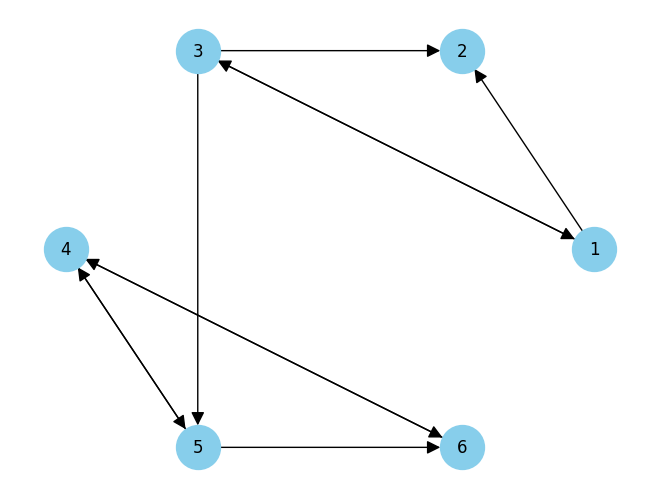

In [ ]:
g = nx.DiGraph()
g.add_nodes_from([1,2,3,4,5,6])
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(3,1)
g.add_edge(3,2)
g.add_edge(3,5)
g.add_edge(5,4)
g.add_edge(5,6)
g.add_edge(4,5)
g.add_edge(4,6)
g.add_edge(6,4)

options = {
    'node_color': 'skyblue',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}

npos=nx.circular_layout(g,scale=1)

nx.draw(g,pos = npos, with_labels=True, **options, arrows=True)
plt.show()

### Calculando la Matriz de Adyacencia

In [ ]:
A=nx.convert_matrix.to_numpy_array(g)
print(A)

[[0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]


### Calculando la Matriz de Transición

In [ ]:
N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j] = 1/N
print(P)

[[0.         0.5        0.5        0.         0.         0.        ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.33333333 0.33333333 0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.         0.         0.        ]]


## Definiendo la Matriz de Google

alpha es un factor de amortiguación escalar (normalmente 0,85), que es la probabilidad de que un navegante aleatorio haga clic en un enlace de la página actual, en lugar de continuar en otra página aleatoria.

In [ ]:
G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
print(G)

[[0.025      0.45       0.45       0.025      0.025      0.025     ]
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.30833333 0.30833333 0.025      0.025      0.30833333 0.025     ]
 [0.025      0.025      0.025      0.025      0.45       0.45      ]
 [0.025      0.025      0.025      0.45       0.025      0.45      ]
 [0.025      0.025      0.025      0.875      0.025      0.025     ]]


## Calculando el PageRank

La distribución estacionaria es el valor del PageRank

In [ ]:
eigvals, eigvecs = np.linalg.eig(G.T)
eigvec1 = eigvecs[:,np.isclose(eigvals, 1)]
eigvec1 = eigvec1[:,0]

stationary = eigvec1 / eigvec1.sum()

stationary = stationary.real
for i in range(0,N):
    print(i+1, ':', stationary[i])

1 : 0.051704745757020804
2 : 0.07367926270375494
3 : 0.05741241249643235
4 : 0.3487036852148171
5 : 0.19990381197331858
6 : 0.26859608185465633


Podemos visualizar el grafo donde el tamaño de los vértices es proporcional al PageRank.


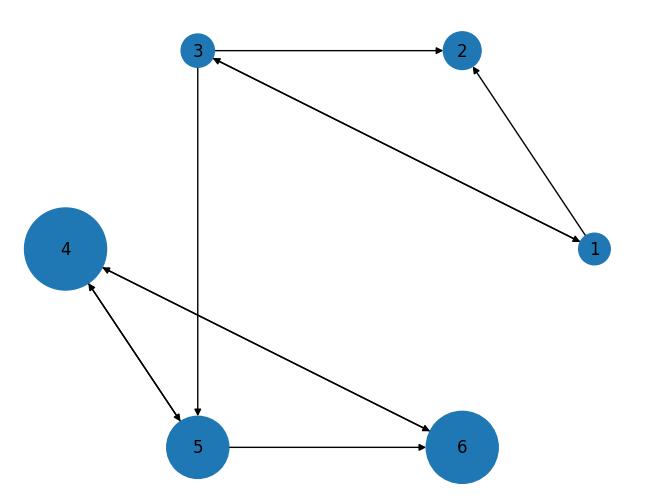

In [ ]:
npos=nx.circular_layout(g,scale=1)

s = stationary*10000
nx.draw(g,pos = npos, with_labels=True, node_size = s, arrows=True)
plt.draw()
plt.show()

# Ejemplo 2

## Definiendo el Grafo

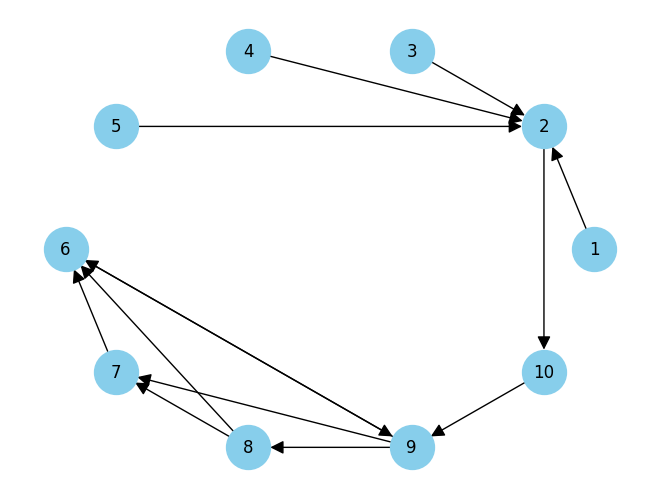

In [ ]:
N = 10
g = nx.DiGraph()
g.add_nodes_from(np.arange(1,N+1))
g.add_edge(1,2)
g.add_edge(3,2)
g.add_edge(4,2)
g.add_edge(5,2)
g.add_edge(2,10)
g.add_edge(10,9)
g.add_edge(9,8)
g.add_edge(8,7)
g.add_edge(7,6)
g.add_edge(6,9)
g.add_edge(9,7)
g.add_edge(9,6)
g.add_edge(8,6)

options = {
    'node_color': 'skyblue',
    'node_size': 1000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 20,
}


npos=nx.circular_layout(g,scale=1)
#npos = nx.spring_layout(g)
nx.draw(g,pos = npos, with_labels=True, **options, arrows=True)
plt.draw()


### Calculando la Matriz de Adyacencia

In [ ]:
A=nx.convert_matrix.to_numpy_array(g)
print(A)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Calculando la Matriz de Transición

In [ ]:
N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j] = 1/N
print(P)

[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5
  0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.33333333
  0.33333333 0.33333333 0.         0.        ]
 [0.         0.         0.  

## Definiendo la Matriz de Google

In [ ]:
G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
print(G)

[[0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.865     ]
 [0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.865      0.015      0.015      0.015      0.015
  0.015      0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.015      0.015      0.865      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.865
  0.015      0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.44
  0.44       0.015      0.015      0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.29833333
  0.29833333 0.29833333 0.015      0.015     ]
 [0.01

## Calculando el PageRank

In [ ]:
eigvals, eigvecs = np.linalg.eig(G.T)
eigvec1 = eigvecs[:,np.isclose(eigvals, 1)]
eigvec1 = eigvec1[:,0]

stationary = eigvec1 / eigvec1.sum()

stationary = stationary.real
for i in range(0,N):
    print(i+1, ':', stationary[i])

1 : 0.014999999999999994
2 : 0.06600000000000009
3 : 0.015000000000000008
4 : 0.015000000000000008
5 : 0.014999999999999989
6 : 0.2626353316271941
7 : 0.14196504412280775
8 : 0.09962459236688254
9 : 0.2986750318831152
10 : 0.07110000000000025


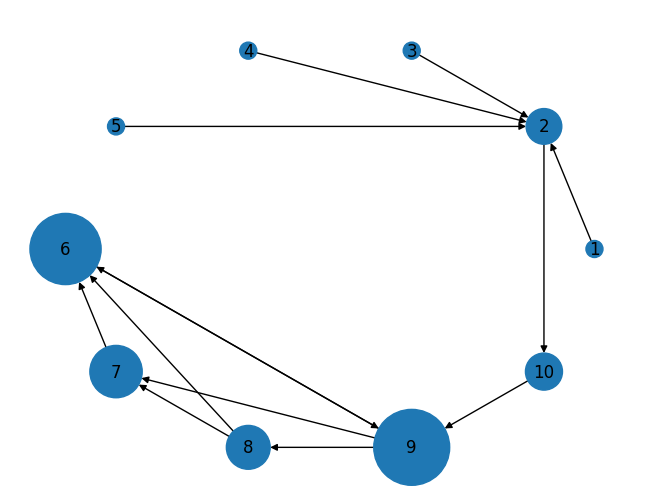

In [ ]:
npos=nx.circular_layout(g,scale=1)

s = stationary*10000
nx.draw(g,pos = npos, with_labels=True, node_size = s, arrows=True)
plt.draw()